# Object Detection Using Image

In [1]:
import cv2
import matplotlib.pyplot as plt

config_file=r"ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model=r"frozen_inference_graph.pb"

In [2]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [3]:
classlabels=[]  #empty
file_name="coco_name.txt"
with open(file_name,"rt") as fpt:
    classlabels=fpt.read().rstrip("\n").split("\n")
    


In [4]:
print(classlabels)
print(len(classlabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)    #255/2 = 127.5
model.setInputMean((127.5,127.5,127.5))    #mobilenet  =[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001BCE6AFD8D0>

In [6]:
img=cv2.imread(r"Traffic.jpg")

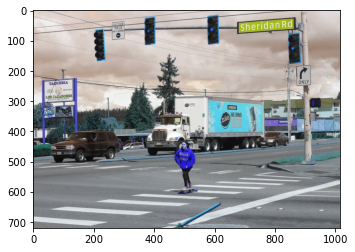

In [7]:
plt.imshow(img)

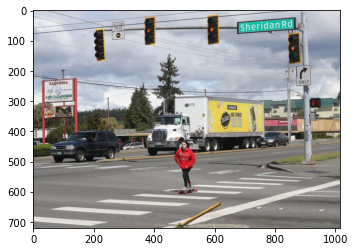

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [10]:
print(ClassIndex)   #Label Index

[ 8  3  1  8 10 10 10  8 10  3  8  8  3 10]


In [11]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)

100

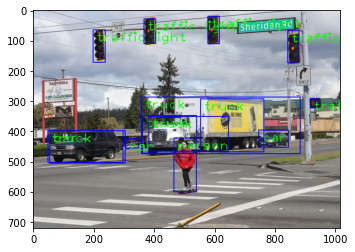

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

cv2.imshow("Output",img)
cv2.waitKey(0)

# Object Detection Using Video

In [ ]:
#cap=cv2.VideoCapture("C:\Demo.mp4")
cap=cv2.VideoCapture(1)    ###For Laptop Cam ...Any web cam 1,2...

#checking the video is opening Correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't Open Video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)
                
    cv2.imshow("Object Detection",frame)
    
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()


()
[16]
[16]
()
()
()
()
()
()
()
()
()
()
()
[18]
[17]
[18]
[18]
[18]
[18]
()
()
()
()
()
()
()
()
()
()
[75 75 75 75]
[77 77 77 77 77]
[77 77]
[77 77]
[77 77 77]
()
[77]
[77 77 77 77]
()
()
()
[73]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[72]
()
()
()
[62 62]
()
()
()
()
[ 1 62  1 62]
[ 1  1 62 62  1 62 62 62  1 62]
[ 1  1 62 62  1 62]
[ 1  1  1 62 62]
[ 1  1  1 62 62 62]
[ 1  1 62 62 62]
[ 1  1 62 62 62 62]
[ 1  1  1 62 62 62 62]
[ 1  1 62 62  1 72]
[ 1  1 72  1 62 62]
[ 1  1  1 62 62 62 62  1 62]
[ 1  1 62 62 62]
[ 1  1 62  1 62 62 62]
[ 1  1  1 62 62]
[ 1  1 62  1]
[ 1  1  1 62]
[ 1  1  1  1 62]
[1 1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 62]
[ 1  1  1 62]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1]
[ 1 62 62 62  1]
[62  1  1]
[ 1  1 62]
[ 1 62  1]
[ 1 62 62  1]
[ 1 62 62  1  1]
[ 1 62 62  1 73]
[ 1  1 62 62]
[ 1  1  1 62  1  1 62 62]
[ 1  1 62  1  1]
[62  1  1]
[62  1]
[1 1 1]
[1 1 1 1]
[ 1  1  1 62  1]
[ 1  1  1  1 62 62  1]
[ 1  1 62  1 62]
[ 1  1  1 62  1 62 62